In [6]:
import matplotlib.pyplot as plt
import pandas as pd

from pymongo import MongoClient
from datetime import datetime
from matplotlib.font_manager import FontManager, FontProperties

# 设置全局字体为中文字体
font_path = '/System/Library/Fonts/PingFang.ttc'
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

In [2]:
client = MongoClient('127.0.0.1', 27017)
db = client['aoao-ai']

In [10]:
def load_day_order_df(day):
    spec = {
        'day': day
    }
    data = []
    records = db['order.predict'].find(spec).sort([('hour', 1)])
    for record in records:
        doc = {
            'hour': record['hour'],
            'order_count': record['order_count'],
            'predict_order_count': record['predict_order_count']
        }
        data.append(doc)
    df = pd.DataFrame(data)
    return df

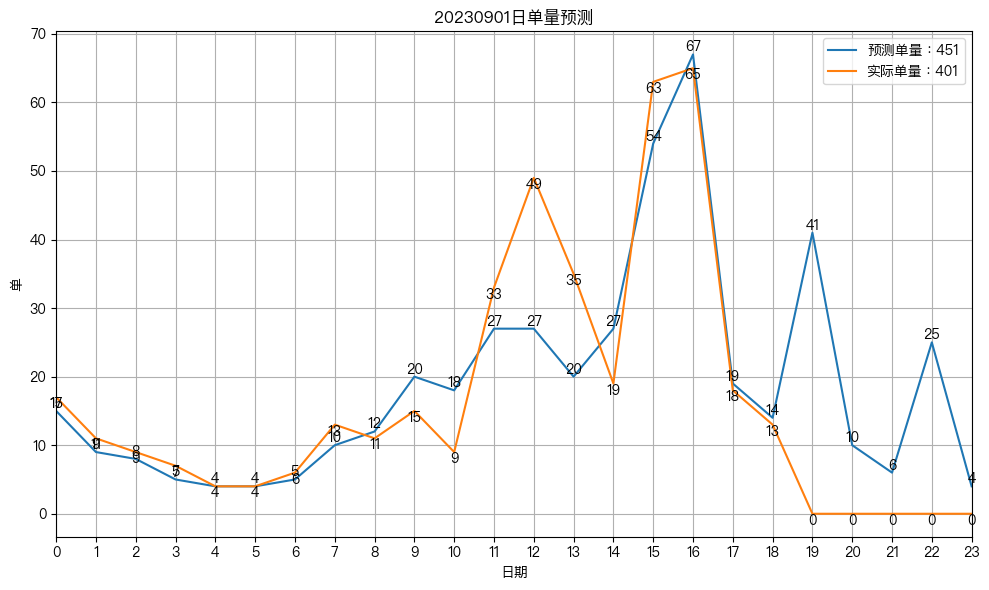

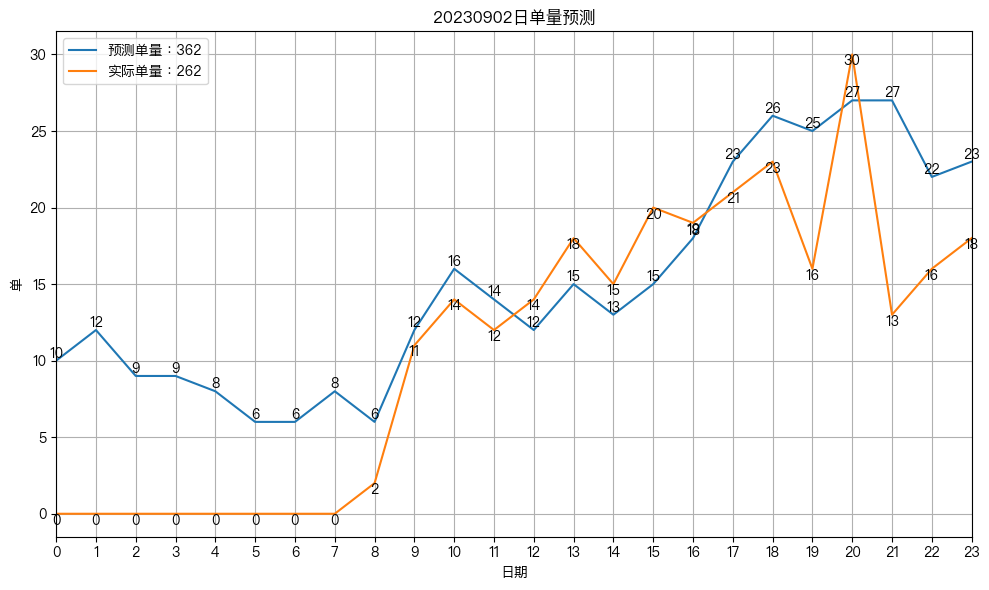

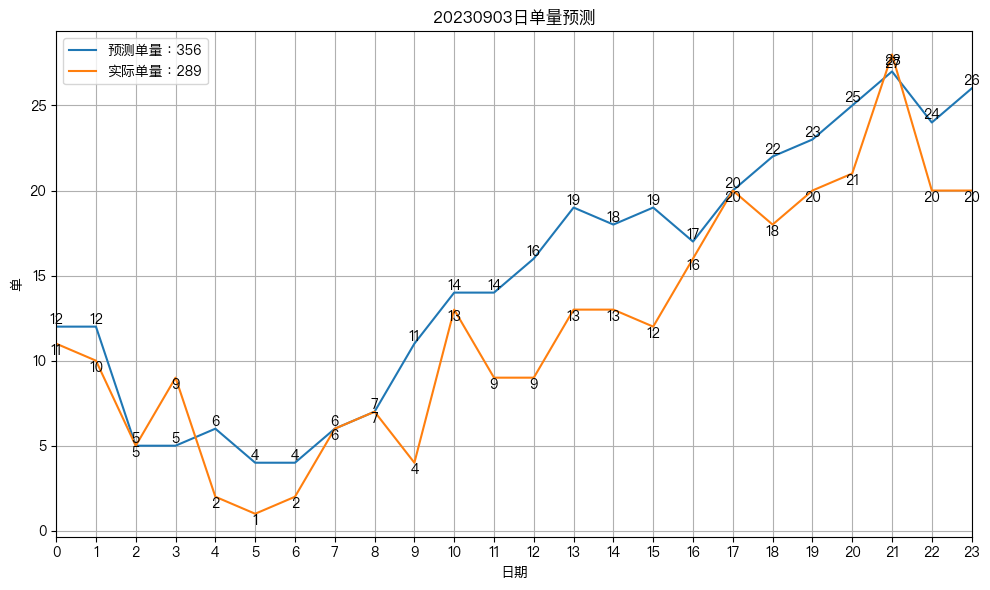

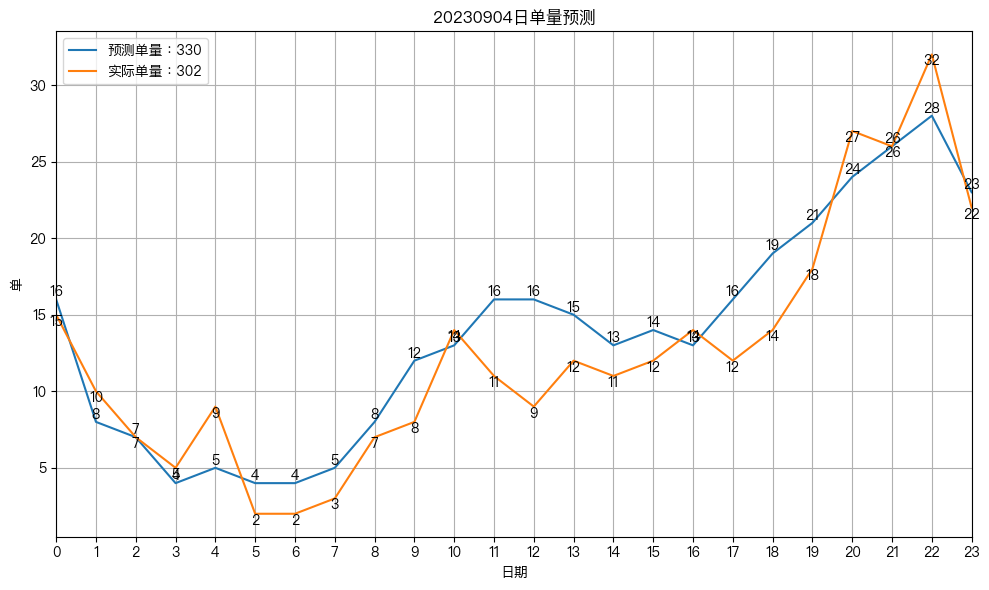

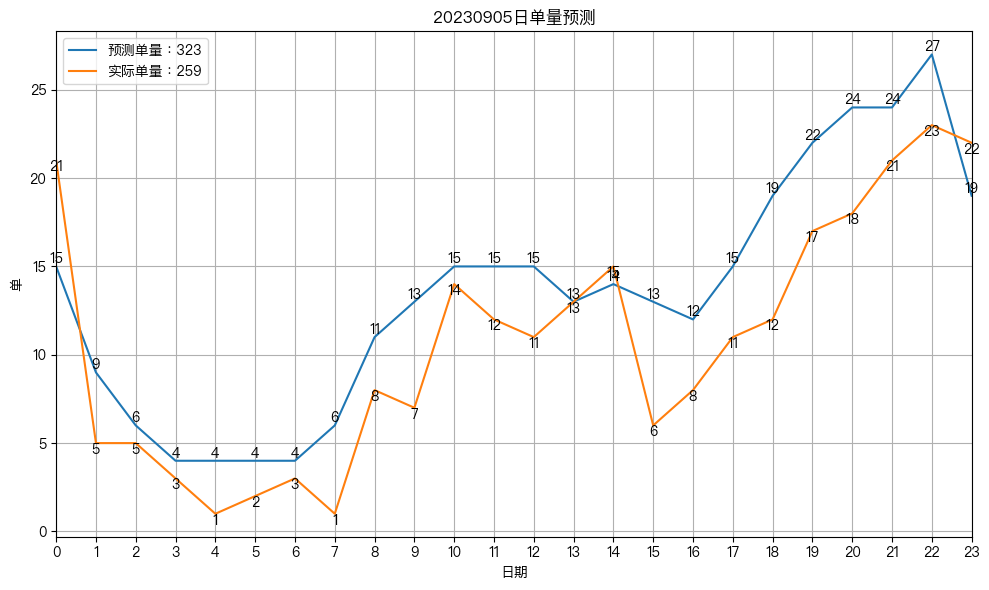

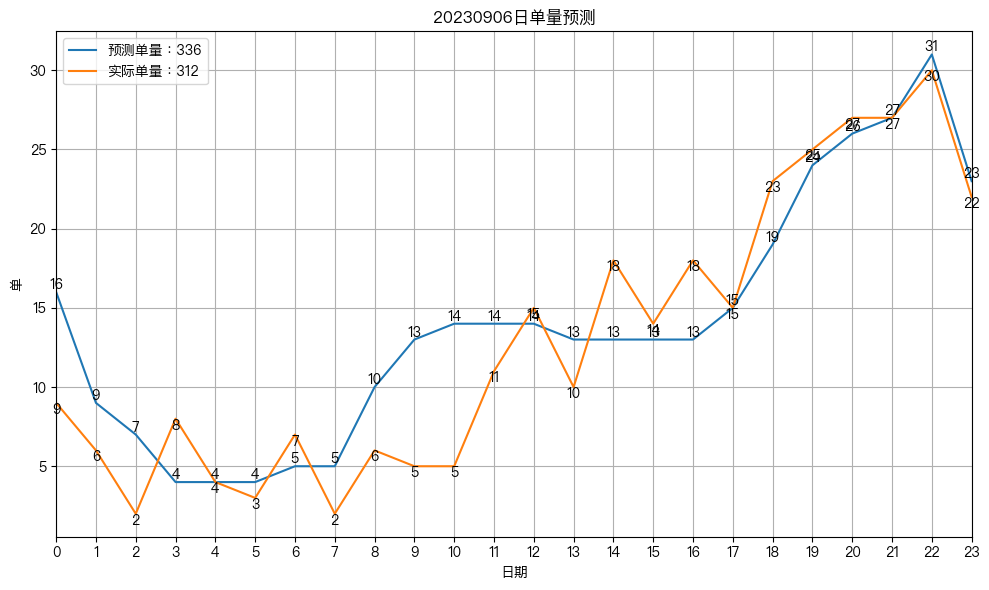

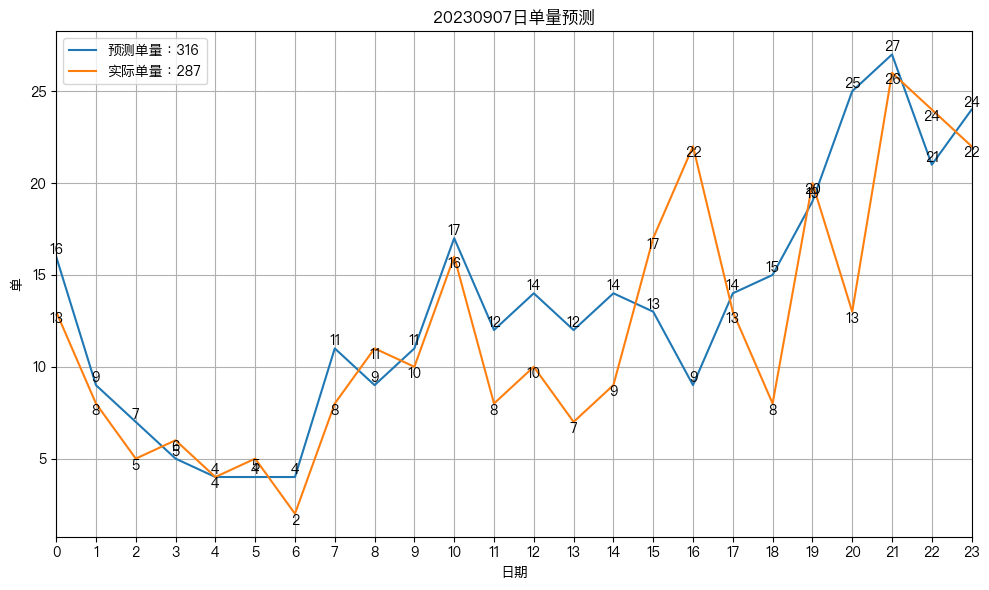

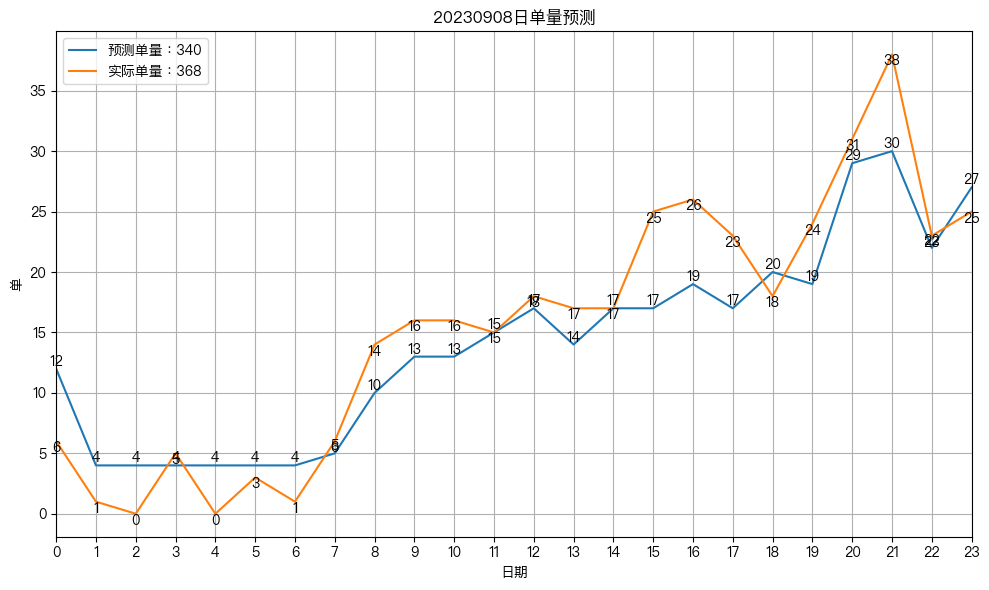

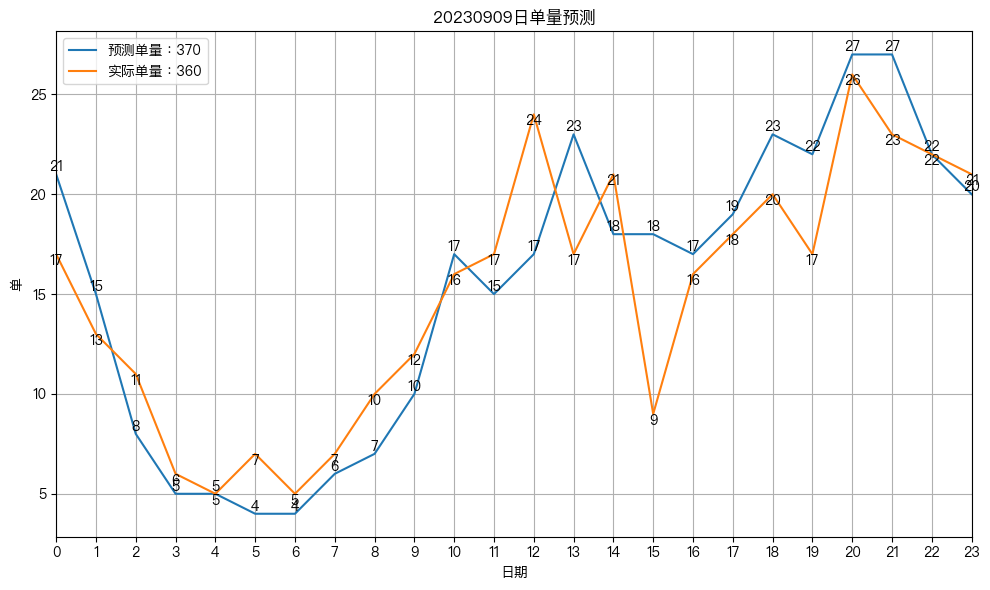

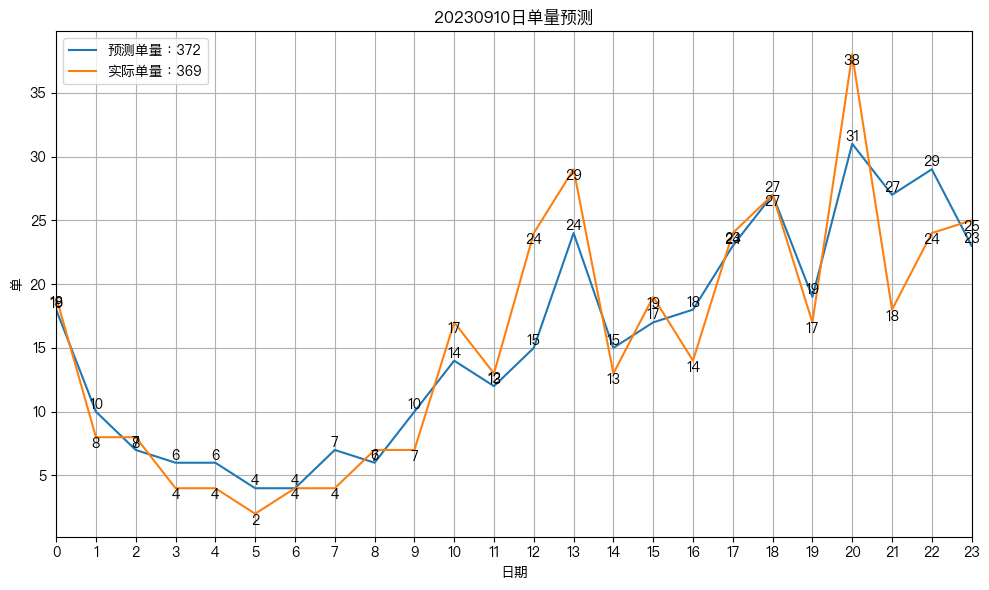

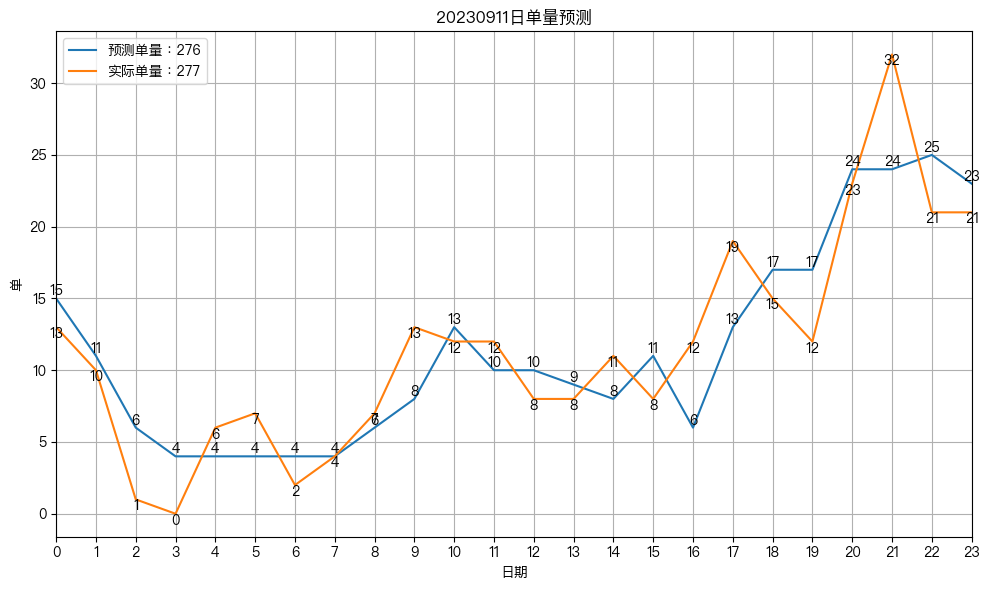

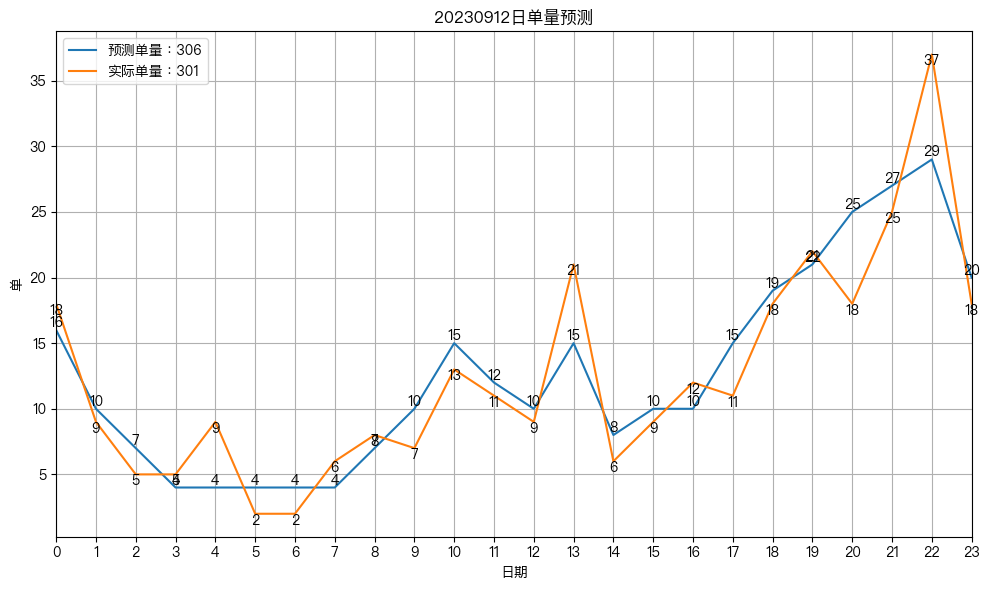

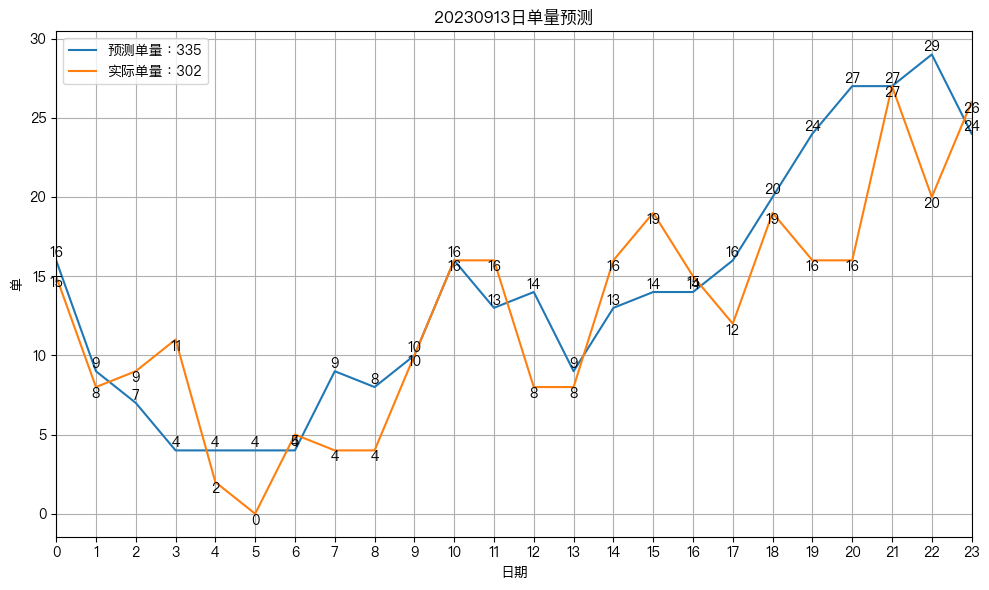

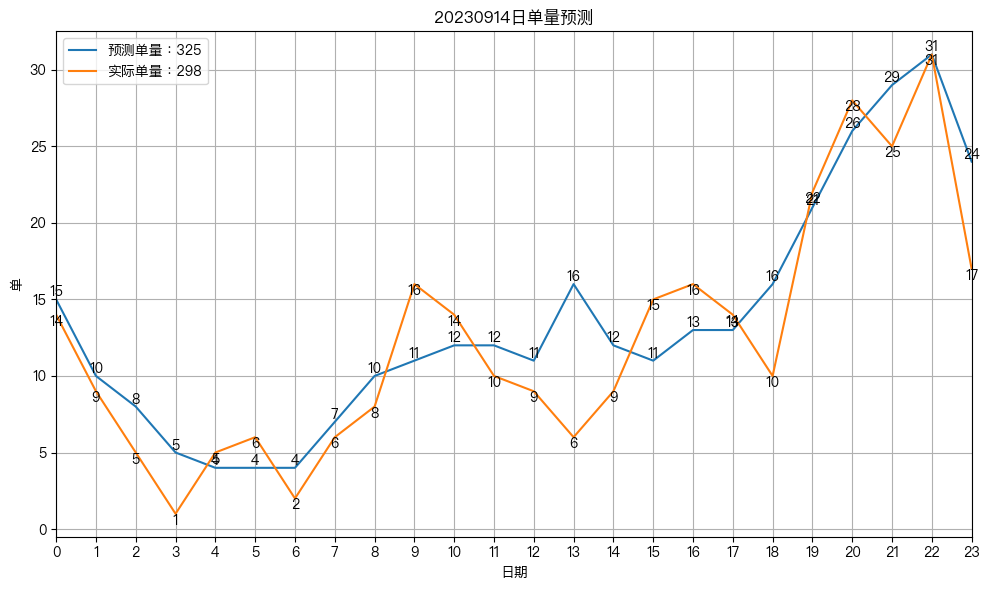

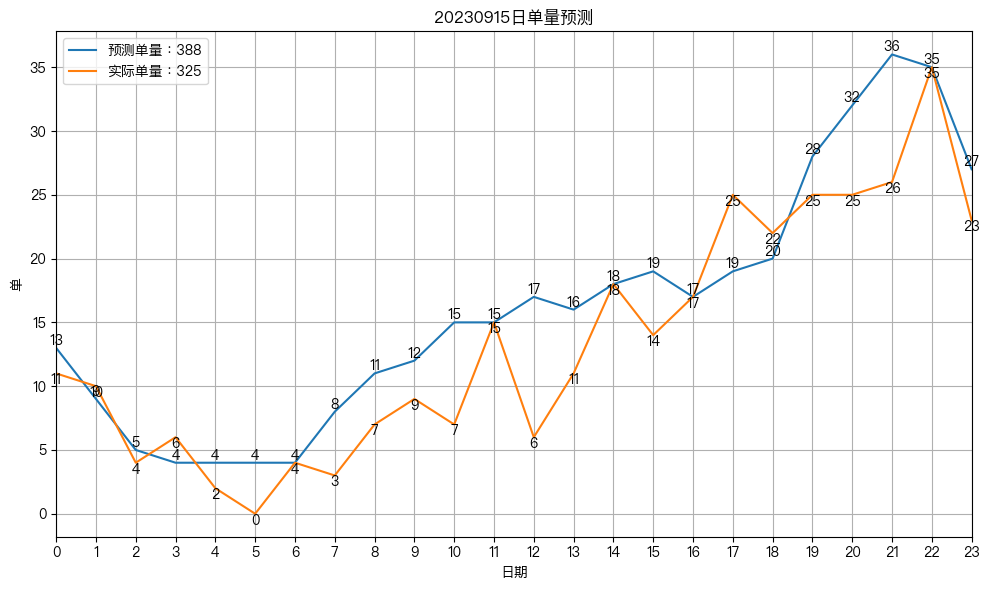

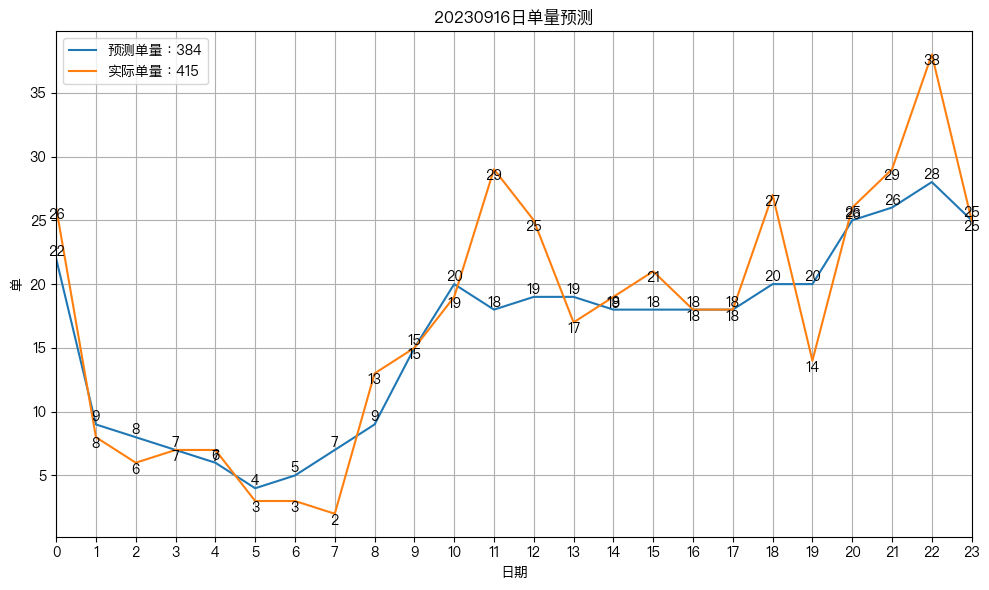

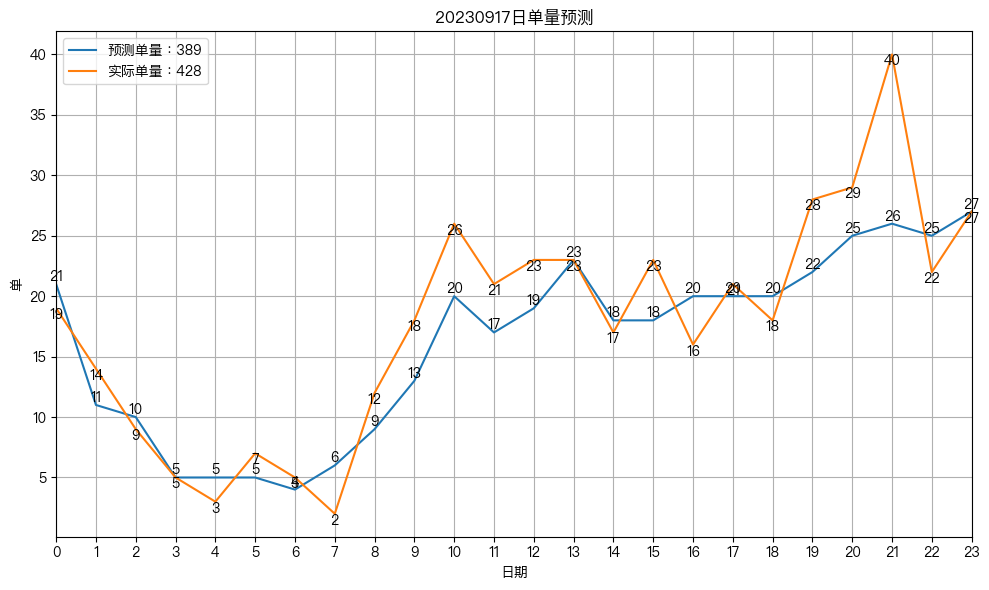

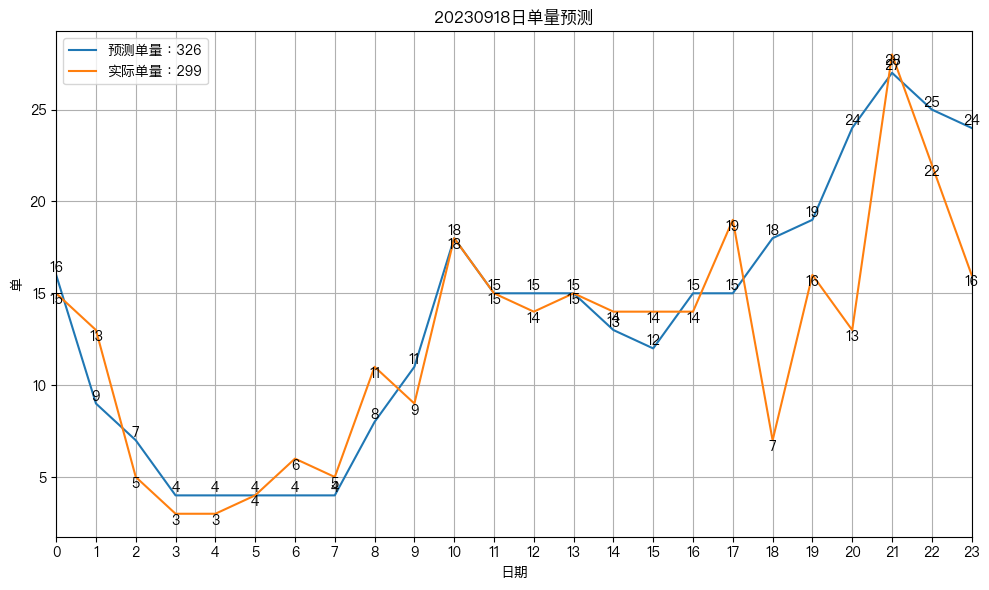

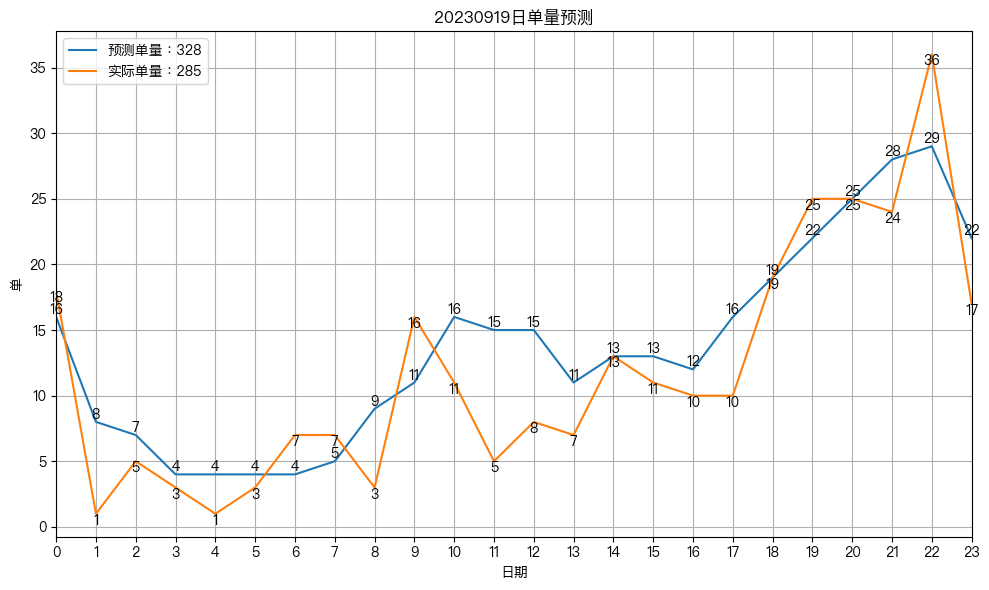

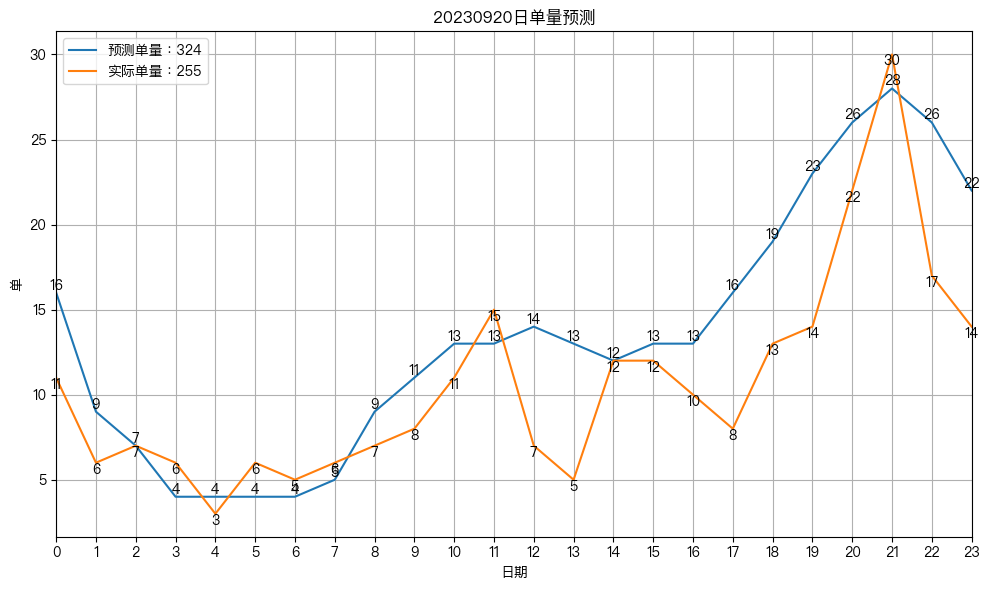

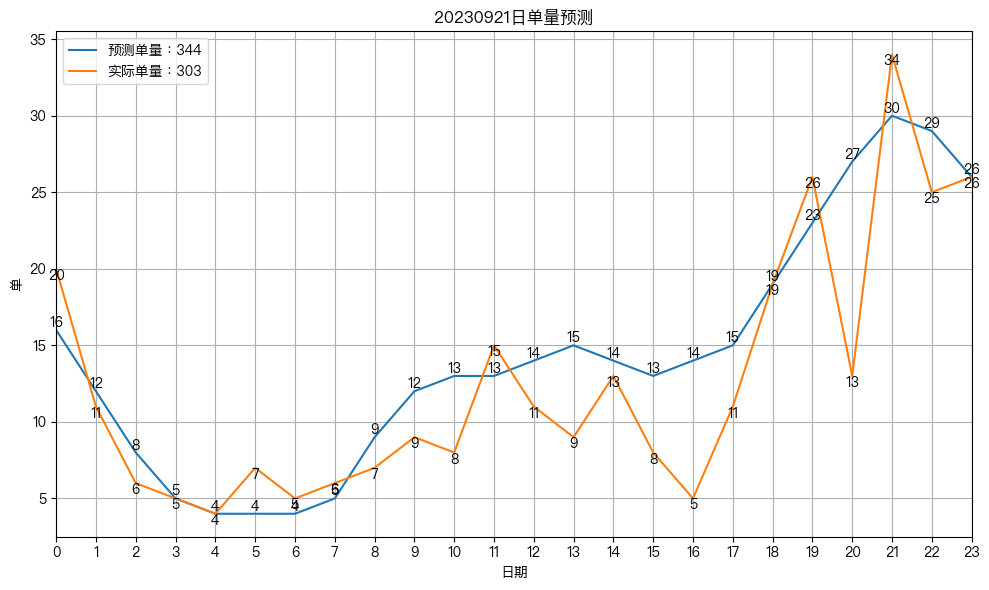

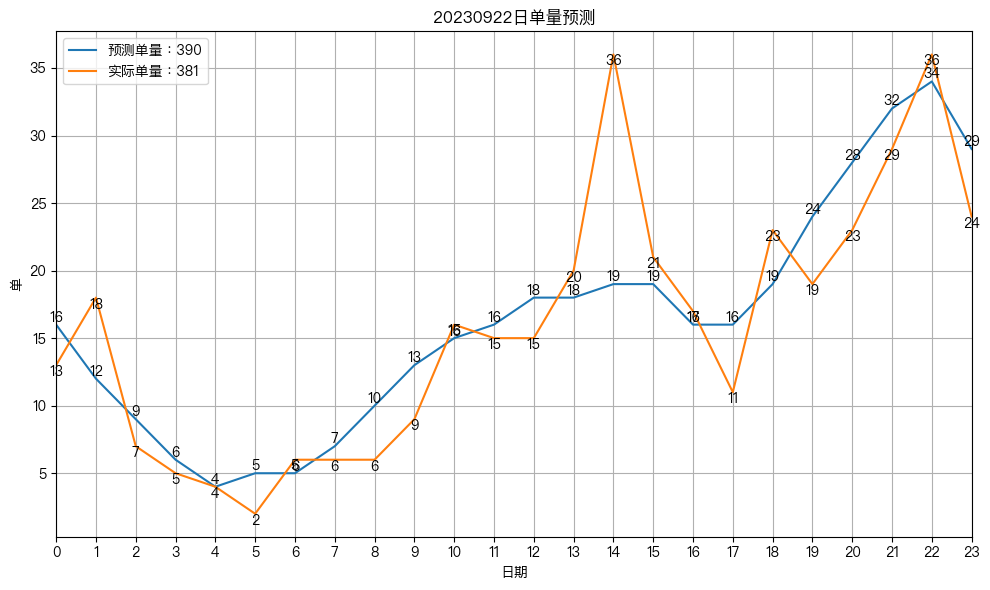

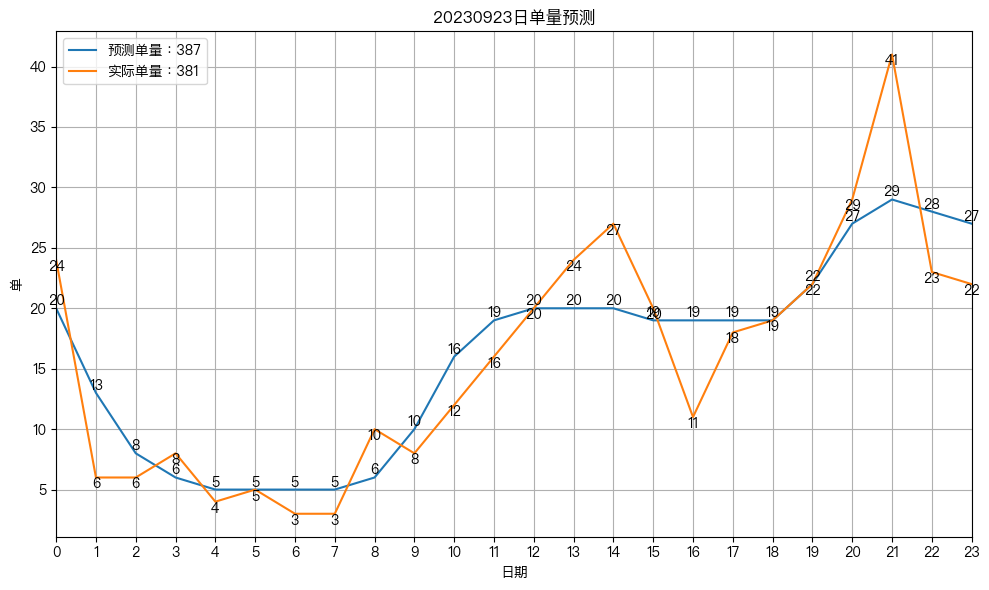

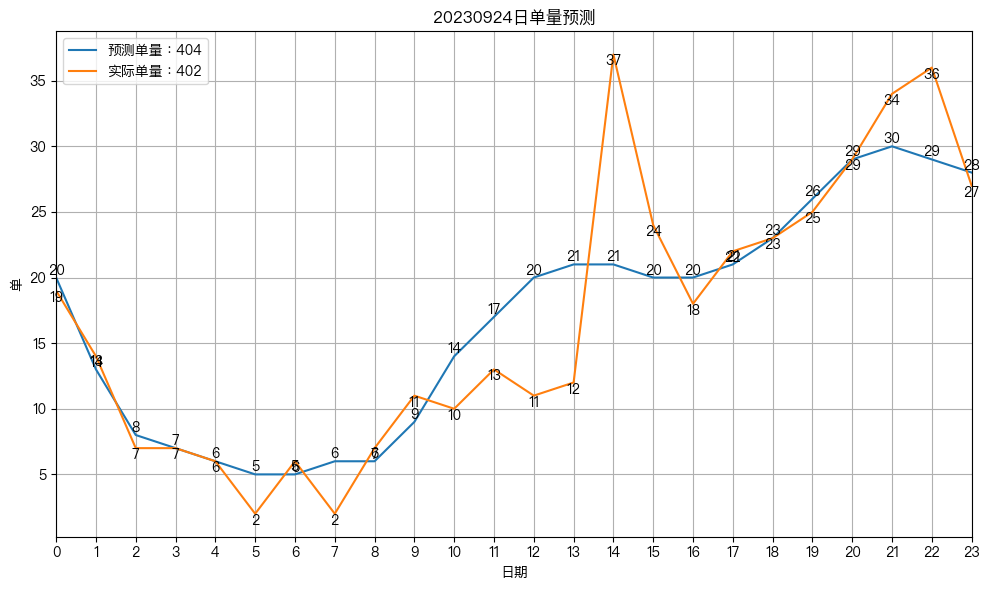

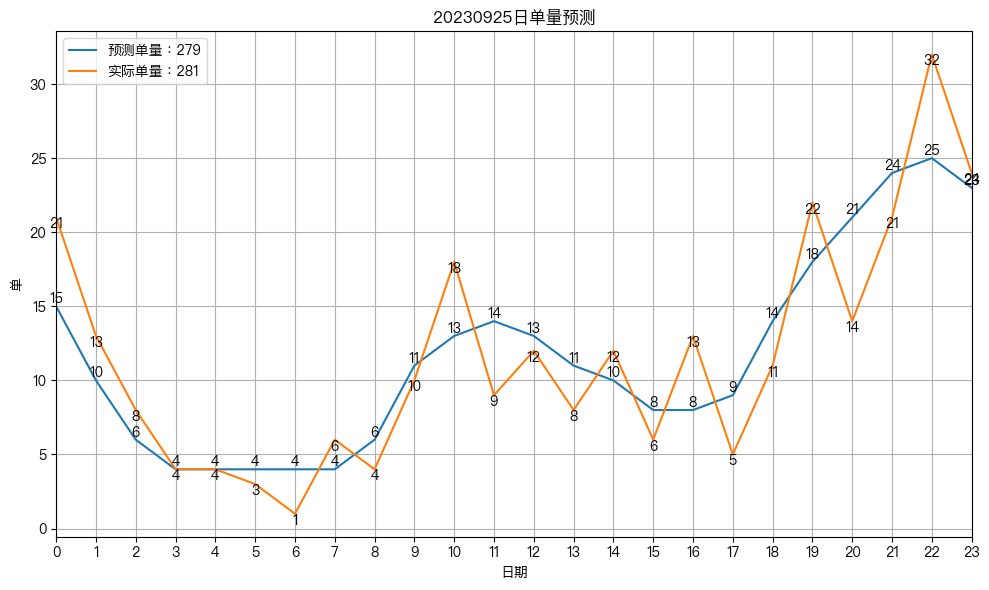

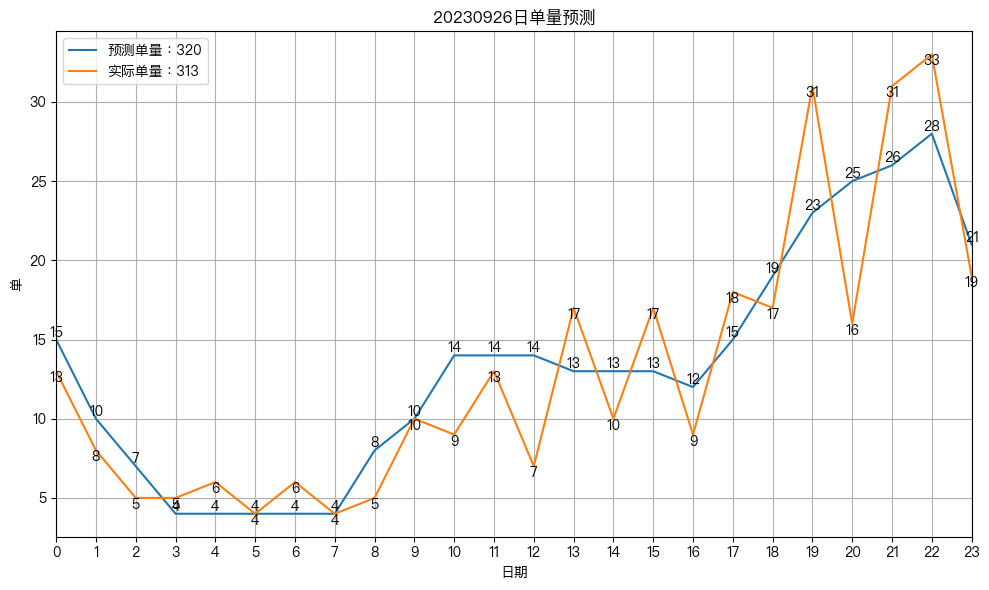

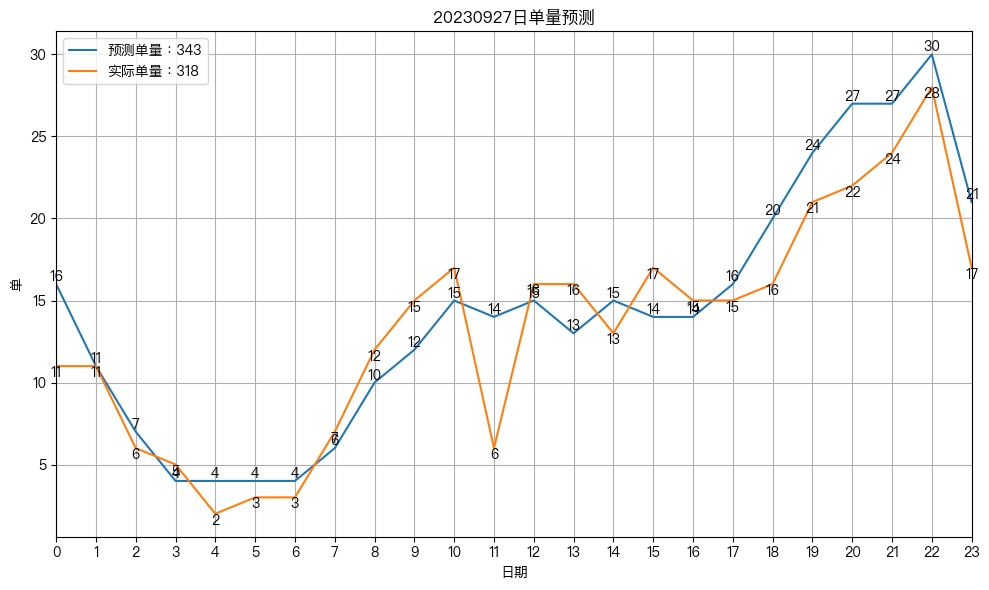

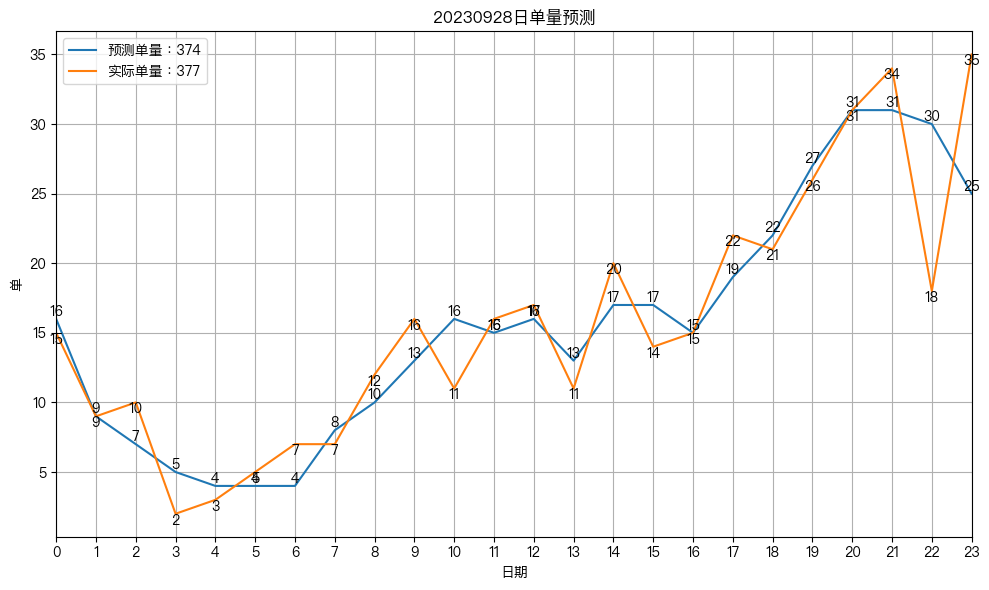

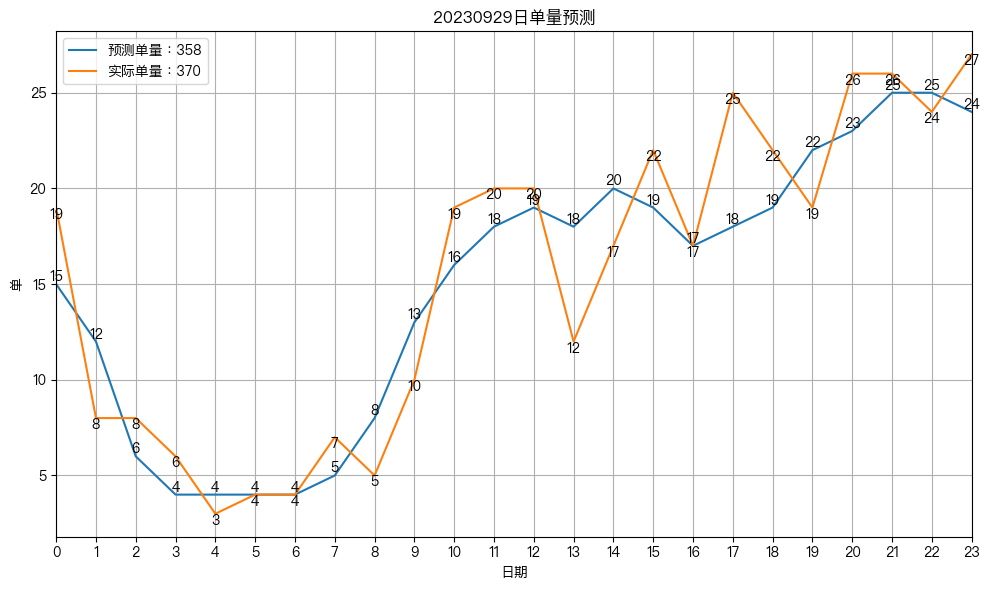

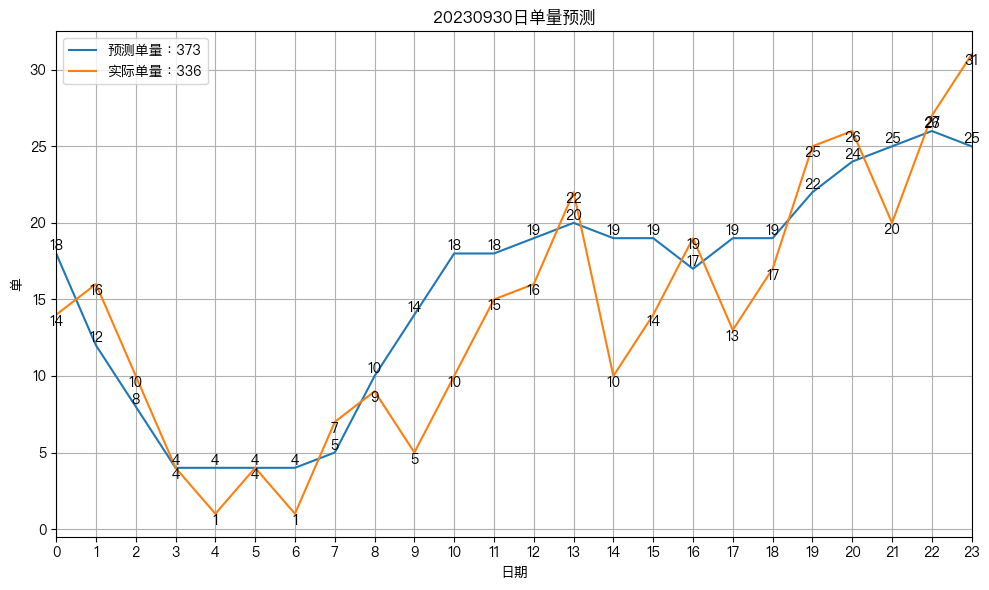

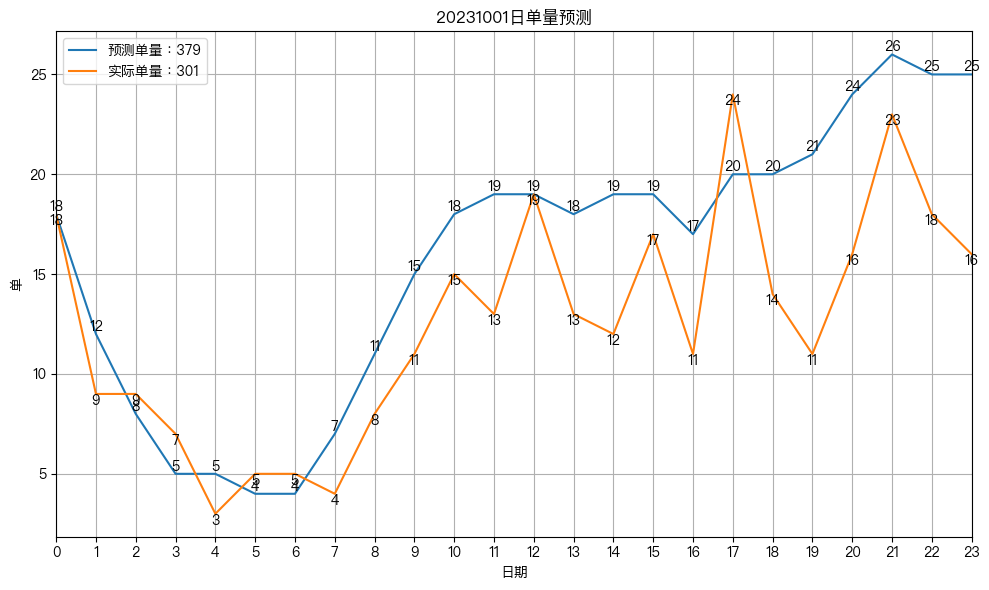

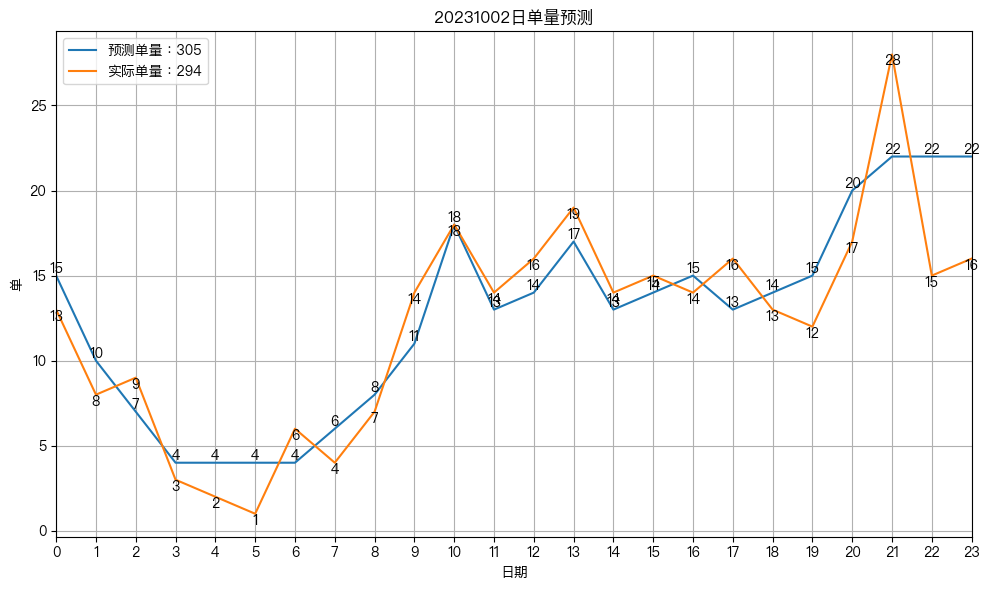

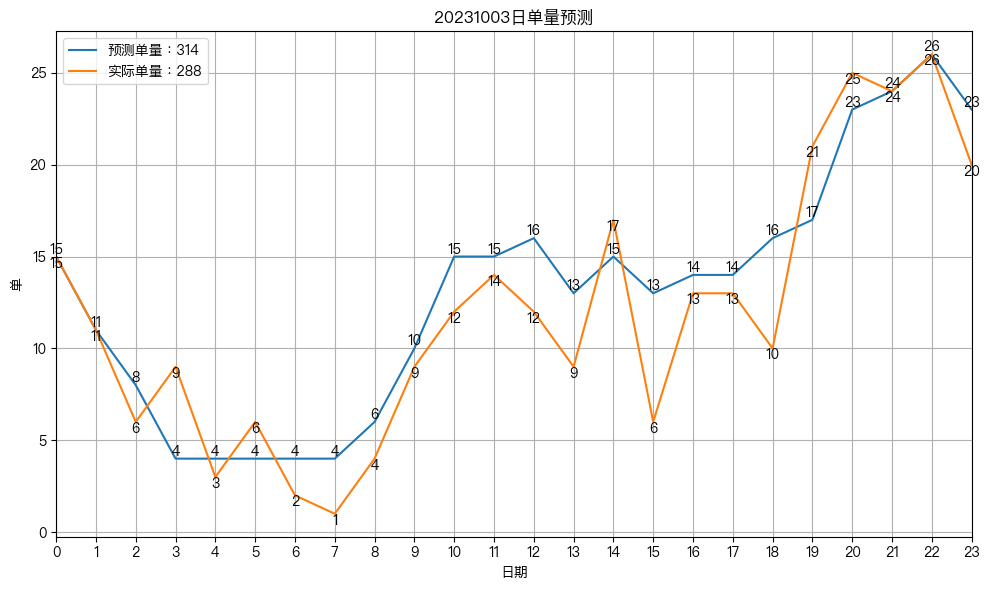

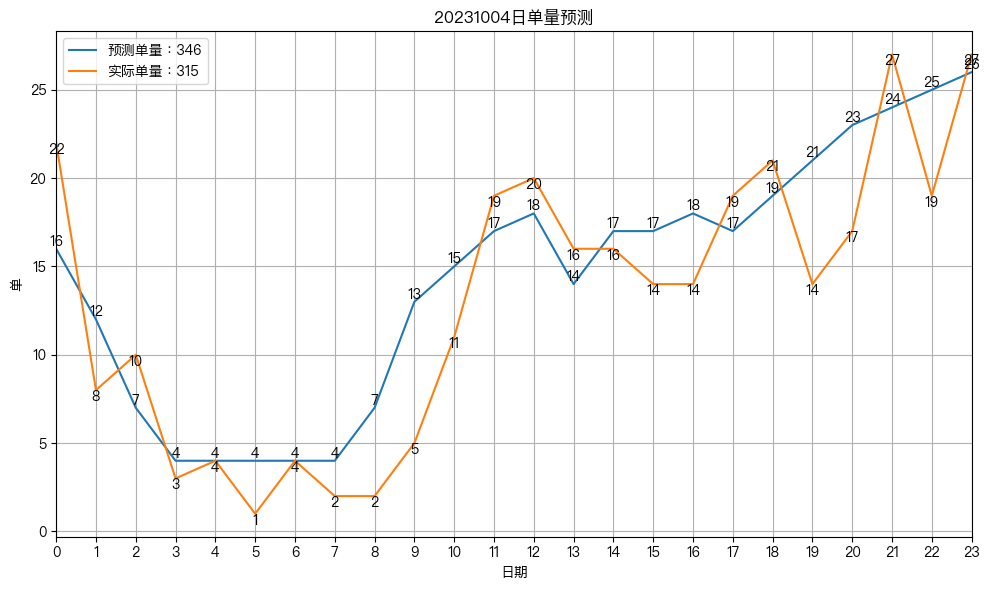

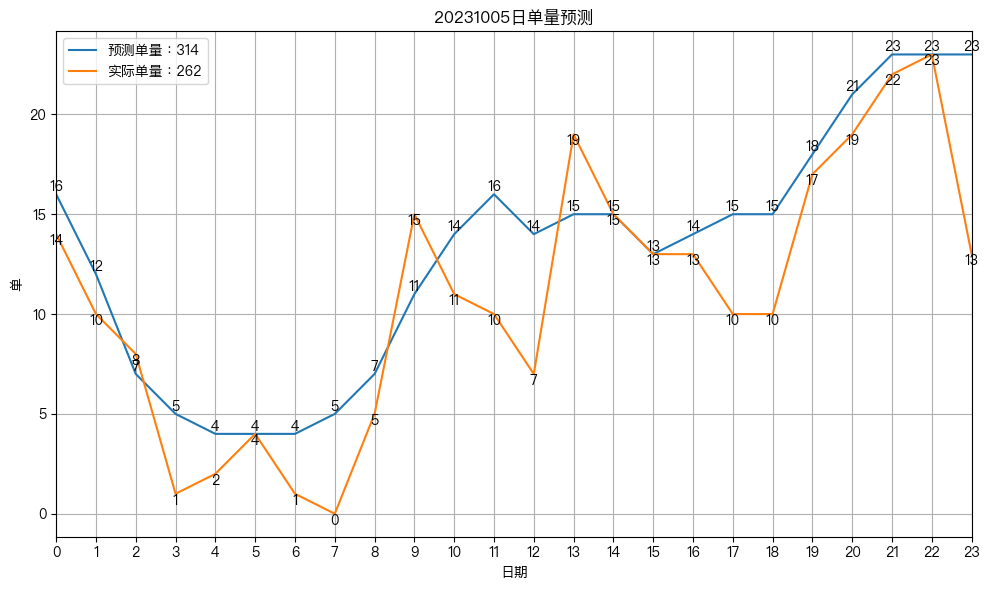

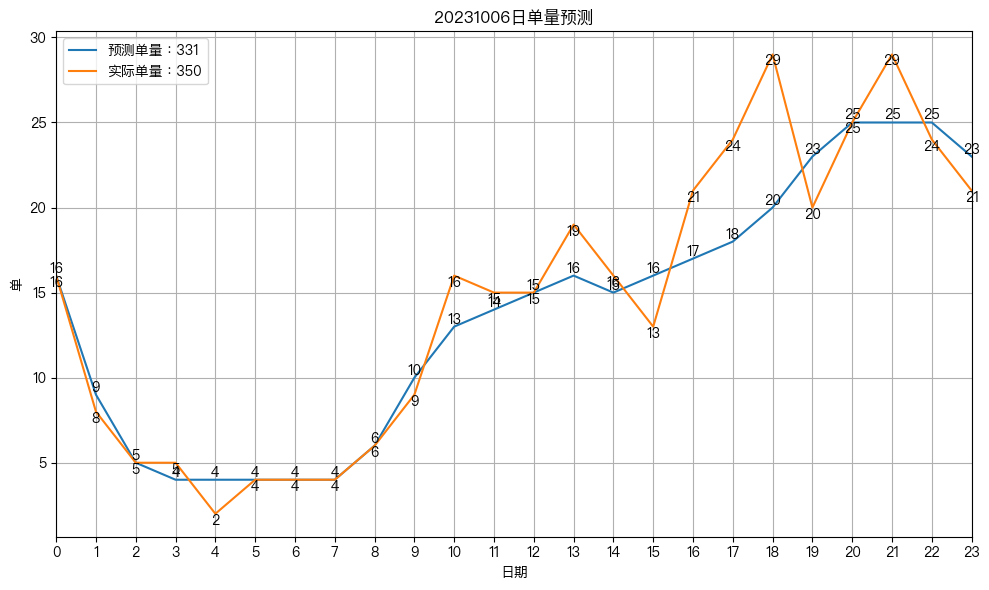

In [57]:
def draw_day_line(day):
    df = load_day_order_df(day)
    if df.index.size == 0:
        return
    order_count = df['order_count'].sum()
    predict_order_count = df['predict_order_count'].sum()
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df['hour'], df['predict_order_count'], label=f'预测单量：{predict_order_count}')
    ax.plot(df['hour'], df['order_count'], label=f'实际单量：{order_count}')
    ax.legend()
    ax.set_title(f'{day}日单量预测')
    ax.set_xlabel('日期')
    ax.set_ylabel('单')
    plt.xticks(range(24))
    plt.xlim(0, 23)
    plt.grid(True)
    plt.tight_layout()

    # 在每个点上显示数值
    for i in range(len(df)):
        x = df['hour'][i]
        y_pred = df['predict_order_count'][i]
        y_actual = df['order_count'][i]
        plt.text(x, y_pred, str(y_pred), ha='center', va='bottom')
        plt.text(x, y_actual, str(y_actual), ha='center', va='top')

    plt.show()
    plt.pause(1)


days = range(20230901, 20231007)
for day in days:
    draw_day_line(day)